## Street network centrality analysis

We can calculate and visualize how "important" a node or an edge is in a street network by measuring its centrality.

In some traditions of street network analysis, streets are represented as nodes and intersections are represented as edges. This is called a line graph, or sometimes a dual graph, and it essentially inverts the topology of the street network seen above. We can do this with OSMnx too.

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)
  - [Journal article/citation](http://geoffboeing.com/publications/osmnx-complex-street-networks/)

In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd
%matplotlib inline
ox.config(log_console=True, use_cache=True)

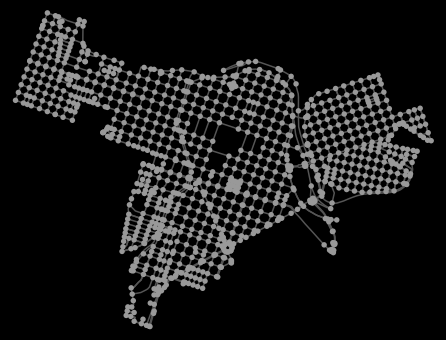

In [2]:
# download and project a street network
lugares = ['Centro, Cordoba, Argentina',
           'Nueva Cordoba, Cordoba, Argentina',
           'Guemes, Cordoba, Argentina',
           'Alberdi, Cordoba, Argentina',
           'Juniors, Cordoba, Argentina',
           'General Paz, Cordoba, Argentina']
G = ox.graph_from_place(lugares, network_type='drive')
G = ox.project_graph(G)
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color='#999999', node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

## Calculate and visualize node centrality

In [3]:
# node closeness centrality
node_centrality = nx.closeness_centrality(G)

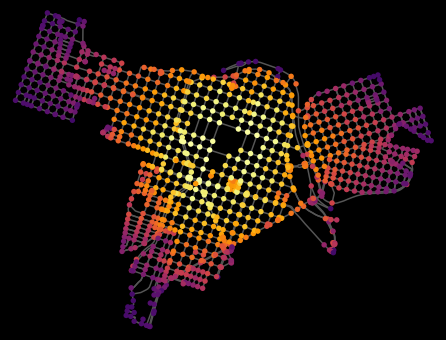

In [4]:
# plot it
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)